## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

### 규제 선형 모델의 개요

좋은 머신러닝 회귀 모델의 특징?

=> 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.

이전까지의 선형 모델의 비용 함수는 RSS(실제 값과 예측 값의 차이)를 최소화 하는 것만 고려.

그러나 이는 학습 데이터에 지나치게 최적화되어 회귀 계수가 쉽게 커졌다.

그로 인해 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉬웠다.

이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과   
과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.

> `비용 함수 목표 = Min(RSS(W) + alpha*|W|)`

여기서 `alpha`는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터이다.

alpha가 0(또는 매우 작은 값)이라면 비용 함수의 식은 기존과 동일한 Min(RSS(W) + 0)이 될 것이고,

반면에 alpha가 무한대(또는 매우 큰 값)라면    
비용 함수 식은 RSS(W)에 비해 alpha*|W| 값이 너무 커지게 되므로 W값을 0(또는 매우 작게)만들어야

**Cost**가 최소화 되는 비용 함수 목표를 달성할 수 있다.

즉, alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며

alpha 값을 작게 하면 W의 값이 커져도 어느 정도 상쇄가 가능하므로

학습 데이터 적합을 더 개선할 수 있다.

---

<br>





이처럼 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 부른다.

규제는 크게 `L2 방식`과 `L1 방식`으로 구분되는데,

`L2 규제`는 W의 제곱에 대해 페널티를 부여하는 방식을 말한다.

`L2 규제`를 적용한 회귀를 `릿지(Ridge)` 회귀라고 한다.

`라쏘(Lasso)` 회귀는 `L1 규제`를 적용한 회귀이다.

`L1 규제`는 W의 절대값에 대해 페널티를 부여한다.

L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다.




---

### 릿지 회귀


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# boston 데이터 세트 로드
boston = load_boston()

In [4]:
# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [7]:
# boston 데이터 세트의 target 배열은 주택 가격이다. 이를 PRICE 칼럼으로 DataFrame에 추가 함.
bostonDF['PRICE'] = boston.target

In [12]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [13]:
# alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [14]:
print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 평균 RMSE : 5.518


In [15]:
# 릿지에 사용될 alpha 파라미터의 값을 정의

alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
  ridge = Ridge(alpha=alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330



## alpha 값의 변화에 따른 피처에 회귀 계수 값을 가로 막대 그래프로 시각화



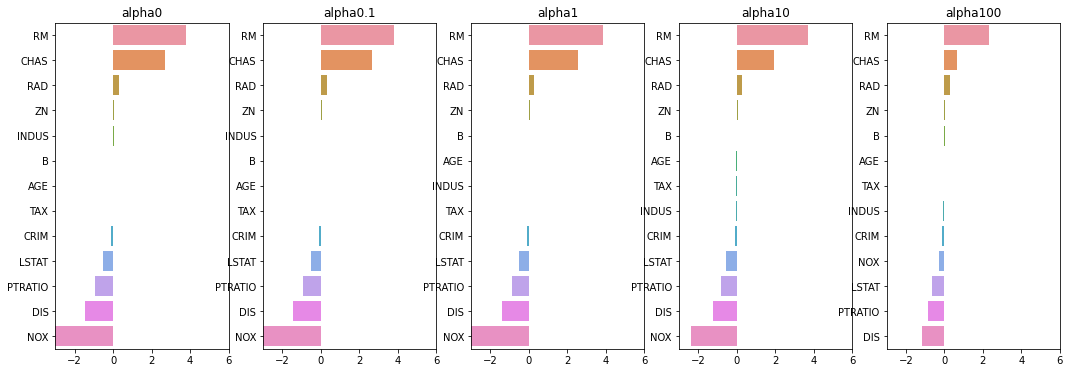

In [17]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데아터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis 위치 지정
for pos, alpha in enumerate(alphas) :
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha' + str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시

plt.show()


alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다.


In [23]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha0,alpha0.1,alpha1,alpha10,alpha100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764



alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 볼 수 있다.

그러나 Ridge 회귀의 경우에는 회귀 계수를 으로 만들지는 않는다.

<br>


### 라쏘 회귀

W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀이다.

L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다.

이러한 측면에서 L1 규제는 `적절한 피처만 회귀에 포함`시키는 피처 선택의 특성을 가지고 있다.



In [27]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('###### ', model_name, '######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha  {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 반환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:' + str(param)
    coeff_df[colname] = coeff
  
  return coeff_df

# end of get_linear_regre_eval

In [28]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha  0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha  0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha  0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha  1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha  3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [29]:
 # 반환된 coeff_lasso_df 를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
 sort_column = 'alpha:' + str(lasso_alphas[0])
 coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000



alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수가 아예 0으로 바뀌는 것을 확인할 수 있다.


---

<br>


### 엘라스틱넷 회귀

`엘라스틱넷(Elastic Net) 회귀`는 *L2 규제와 L1 규제를 결합* 한 회귀이다.

따라서 엘라스틱넷 회귀 비용함수의 목표는 L1, L2를 최소화 하는 W를 찾는 것이다.

라쏘 회귀는 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀력션하고   
다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다.

특히 이러한 성향으로 인해 alpha 값에 따라 회귀 계수의 값이 급격하게 변동할 수도 있는데,

엘라스틱넷 회귀는 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다.

반대로 엘라스틱넷의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것이다.




In [34]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha  0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha  0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha  0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha  1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha  3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [35]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000



alpha 값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

규제 선형 회귀의 가장 대표적인 기법인 릿지, 라쏘, 엘라스틱넷 회귀를 살펴봤다.

이들 중 어떤 것이 가장 좋은지는 상황에 따라 다르다.

각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야 한다.

하지만 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지 ㅇ낳게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요하다.

